In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Examine the Data

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
insurance.apply(pd.unique)

age         [19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...
sex                                            [female, male]
bmi         [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...
children                                   [0, 1, 3, 2, 5, 4]
smoker                                              [yes, no]
region           [southwest, southeast, northwest, northeast]
charges     [16884.924, 1725.5523, 4449.462, 21984.47061, ...
dtype: object

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Clean the Data

In [8]:
insurance.duplicated().sum()

1

In [9]:
insurance = insurance.drop_duplicates(keep='first')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Task 1
### How is age related to medical costs?

Text(0.5, 1.0, 'Age related to Medical costs')

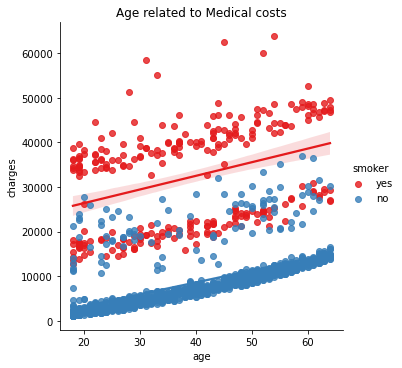

In [10]:
#Plotting a relational plot between age and charges
ax = sns.lmplot(x = 'age', y = 'charges', data = insurance, hue = 'smoker', palette = 'Set1')
plt.title('Age related to Medical costs')

# Task 2
### How is number of children related to medical costs?

Text(0.5, 1.0, 'Number of children related to Medical costs')

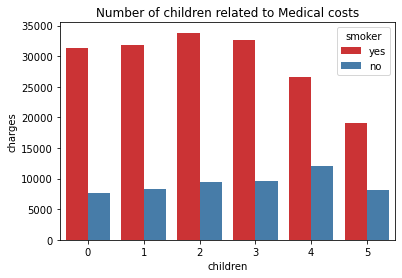

In [11]:
#Plotting a relational plot between children and charges
ax = sns.barplot(x = 'children', y = 'charges', data = insurance, hue = 'smoker', palette = 'Set1', ci = None)
plt.title('Number of children related to Medical costs')

# Task 3
###  How is the number of people distributed by region?

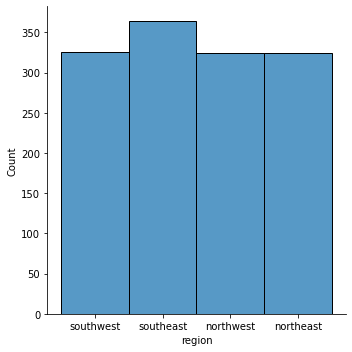

In [12]:
#Plotting a distribution plot by regions
sns.displot(x = 'region', data = insurance)

# Task 4
### How is the number of people distributed by age?

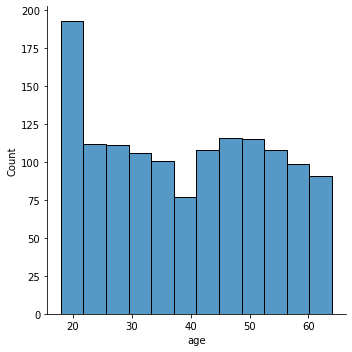

In [13]:
#Plotting a distribution plot by age
sns.displot(x = 'age', data = insurance)

# Task 5
###  How are the charges distributed?

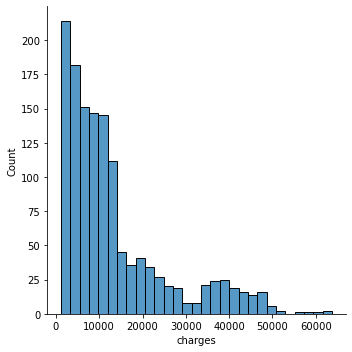

In [14]:
#Plotting a distribution plot by charges
sns.displot(x = 'charges', data = insurance)

# Task 6
### Bin the bmi column. To do that, search the internet to determine how you should bin and label the data.

In [15]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance['bmi_category'] = pd.cut(insurance['bmi'], bins = [0, 18.5, 24.9, 29.9, 34.9, 100], labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese', 'Extremely Obese'])
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


# Task 7
### How are the charges related to the bmi?

Text(0.5, 1.0, 'BMI related to Medical costs')

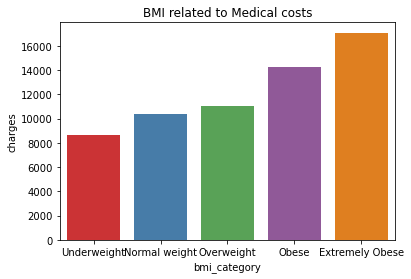

In [17]:
#Plotting a relational plot between bmi and charges
ax = sns.barplot(x = 'bmi_category', y = 'charges', data = insurance, palette = 'Set1', ci = None)
plt.title('BMI related to Medical costs')

# Task 8
###  How is the smoker status related to the charges?

Text(0.5, 1.0, 'Smoker status related to Medical costs')

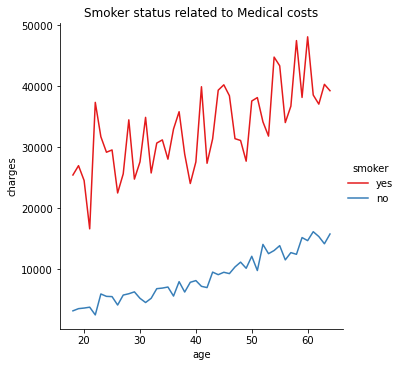

In [18]:
#Plotting a relational plot between smoker and charges
ax = sns.relplot(x = 'age', y = 'charges', kind='line', hue='smoker', data = insurance, palette = 'Set1', ci = None)
plt.title('Smoker status related to Medical costs')

# Task 9
### How are the charges related to the region?

# Task 10
### Which region has the highest obesity percentage?

# Task 11
### Create a simple regression to show the relationship between charges and age.

In [19]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [20]:
label = {
    'no': 0,
    'yes': 1
}

insurance['smoker'] = insurance['smoker'].map(label)

<AxesSubplot:>

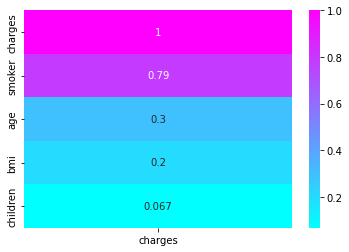

In [21]:
sns.heatmap(insurance.corr()[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='cool')

In [22]:
x_train, x_test, y_train, y_test = train_test_split(insurance[['age']], insurance['charges'], test_size=0.2, random_state=20)

In [23]:
X = insurance[['age']]
y = insurance['charges']

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
model.score(x_train, y_train)

0.0759147613852218

In [25]:
model.score(x_test, y_test)

0.13719304282851263

In [26]:
# Predict charges based on age
predicted_charges = model.predict(X)

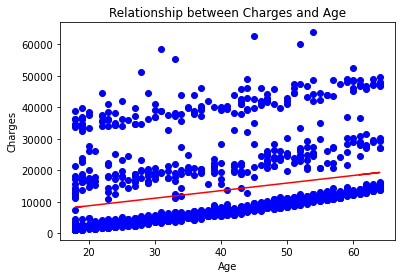

In [27]:
# Plot the data and the regression line
plt.scatter(insurance['age'], insurance['charges'], color='blue', label='Actual Charges')
plt.plot(insurance['age'], predicted_charges, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Charges and Age')
plt.show()

# Task 12
### How does this relationship change with smoking status?

In [28]:
# Separate data for smokers and non-smokers
smokers = insurance[insurance['smoker'] == 1]
non_smokers = insurance[insurance['smoker'] == 0]

In [29]:
# Fit models for each group
model_smokers = LinearRegression().fit(smokers[['age']], smokers['charges'])
model_non_smokers = LinearRegression().fit(non_smokers[['age']], non_smokers['charges'])

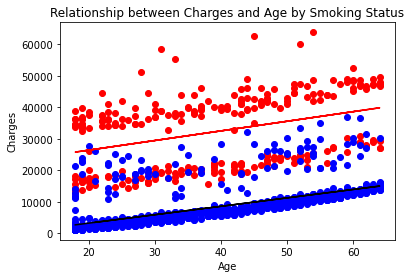

In [30]:
# Plot
plt.scatter(smokers['age'], smokers['charges'], color='red', label='Smokers')
plt.scatter(non_smokers['age'], non_smokers['charges'], color='blue', label='Non-Smokers')
plt.plot(smokers['age'], model_smokers.predict(smokers[['age']]), color='red', label='Smokers Regression Line')
plt.plot(non_smokers['age'], model_non_smokers.predict(non_smokers[['age']]), color='black', label='Non-Smokers Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Charges and Age by Smoking Status')
plt.show()

# Task 13
### How does this relationship change with BMI?

In [31]:
# Separate data for different bmi categories
underweight = insurance[insurance['bmi_category'] == 'Underweight']
normal_weight = insurance[insurance['bmi_category'] == 'Normal weight']
overweight = insurance[insurance['bmi_category'] == 'Overweight']
obese = insurance[insurance['bmi_category'] == 'Obese']
extremely_obese = insurance[insurance['bmi_category'] == 'Extremely Obese']

In [32]:
# # Separate data for smokers and non-smokers
# smokers = insurance[insurance['smoker'] == 1]
# non_smokers = insurance[insurance['smoker'] == 0]

# # Fit models for each BMI category for smokers
# model_smokers = LinearRegression().fit(smokers[smokers['bmi_category'] == 'Underweight'], "Smokers - Underweight")
# model_smokers = LinearRegression().fit(smokers[smokers['bmi_category'] == 'Normal weight'], "Smokers - Normal weight")
# model_smokers = LinearRegression().fit(smokers[smokers['bmi_category'] == 'Overweight'], "Smokers - Overweight")
# model_smokers = LinearRegression().fit(smokers[smokers['bmi_category'] == 'Obese'], "Smokers - Obese")
# model_smokers = LinearRegression().fit(smokers[smokers['bmi_category'] == 'Extremely Obese'], "Smokers - Extremely Obese")

# # Fit models for each BMI category for non-smokers
# model_smokers = LinearRegression().fit(non_smokers[non_smokers['bmi_category'] == 'Underweight'], "Non-Smokers - Underweight")
# model_smokers = LinearRegression().fit(non_smokers[non_smokers['bmi_category'] == 'Normal weight'], "Non-Smokers - Normal weight")
# model_smokers = LinearRegression().fit(non_smokers[non_smokers['bmi_category'] == 'Overweight'], "Non-Smokers - Overweight")
# model_smokers = LinearRegression().fit(non_smokers[non_smokers['bmi_category'] == 'Obese'], "Non-Smokers - Obese")
# model_smokers = LinearRegression().fit(non_smokers[non_smokers['bmi_category'] == 'Extremely Obese'], "Non-Smokers - Extremely Obese")

# Task 14
### Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data.

In [33]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,1,southwest,16884.92400,Overweight
1,18,male,33.770,1,0,southeast,1725.55230,Obese
2,28,male,33.000,3,0,southeast,4449.46200,Obese
3,33,male,22.705,0,0,northwest,21984.47061,Normal weight
4,32,male,28.880,0,0,northwest,3866.85520,Overweight


In [34]:
# Dummy encoding
df_encoded = pd.get_dummies(insurance, columns=['sex', 'region'], drop_first=True)

# Define features (X) and target (y)
df = df_encoded.drop(columns=['charges'])  # X
y = df_encoded['charges']  # target variable

In [35]:
# Rescale continuous features
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_predicted = model.predict(X_test)
y_predicted

array([15404.74117623, 10559.57813821, 15889.25748003, 11044.09444201,
       11044.09444201, 15404.74117623,  9106.0292268 ,  8863.7710749 ,
       13951.19226482, 15404.74117623, 18311.83899905, 16131.51563193,
       11286.35259391, 18311.83899905, 12013.12704961, 14435.70856863,
        8379.2547711 , 12255.38520152,  9832.8036825 , 10559.57813821,
        8379.2547711 , 12255.38520152, 15404.74117623, 12982.15965722,
       11528.61074581,  8621.512923  , 13708.93411292, 18069.58084714,
       15404.74117623, 15162.48302433, 11044.09444201, 15646.99932813,
        7894.73846729, 17827.32269524, 16616.03193574, 15889.25748003,
        8136.99661919, 10801.83629011, 16373.77378384, 14677.96672053,
        8863.7710749 , 13951.19226482, 13951.19226482, 15889.25748003,
       14677.96672053, 10317.31998631,  7894.73846729, 13951.19226482,
       10317.31998631, 12982.15965722, 10317.31998631, 12982.15965722,
       13951.19226482,  8379.2547711 , 13708.93411292, 14193.45041672,
      

# Task 15
### Make predictions with your multiple regression model and evaluate how well your model is working.

In [37]:
# Initialize model and lists to store scores
model = LinearRegression()
testScores = []
trainScores = []

In [38]:
# Loop through different numbers of features
for i in range(1, len(X.columns) + 1):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)

    # Train and score the model
    model.fit(X_train_fs, y_train)
    trainScore = model.score(X_train_fs, y_train)
    testScore = model.score(X_test_fs, y_test)

    # Append scores
    trainScores.append(trainScore)
    testScores.append(testScore)

<AxesSubplot:xlabel='numFeatures'>

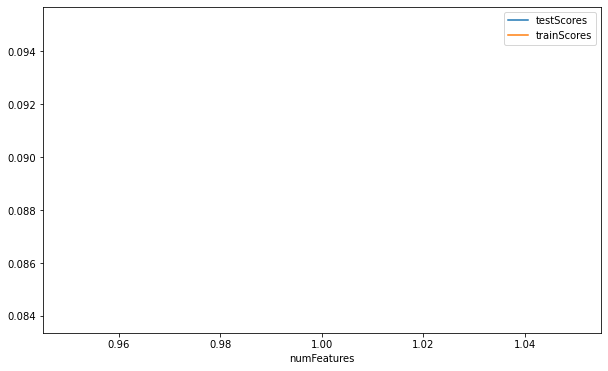

In [39]:
# Create a DataFrame for plotting
df_scores = pd.DataFrame(data={'testScores': testScores, 'trainScores': trainScores})
df_scores.reset_index(inplace=True)
df_scores.rename(columns={'index': 'numFeatures'}, inplace=True)
df_scores['numFeatures'] = df_scores['numFeatures'] + 1
# Plot the results
df_scores.plot(x='numFeatures', y=['testScores', 'trainScores'], figsize=(10, 6))

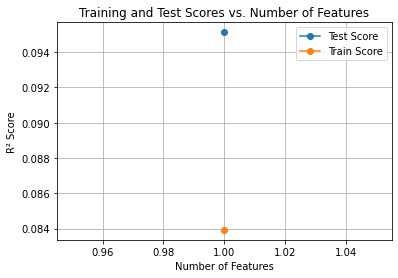

In [40]:
# Plot the results
df_scores.plot(x='numFeatures', y=['testScores', 'trainScores'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.title('Training and Test Scores vs. Number of Features')
plt.legend(['Test Score', 'Train Score'])
plt.grid(True)
plt.show()

In [41]:
# Find the optimal number of features
optimal_num_features = df_scores.loc[df_scores['testScores'].idxmax(), 'numFeatures']
print(f'The optimal number of features for the multiple regression model is: {optimal_num_features}')

The optimal number of features for the multiple regression model is: 1
